In [7]:
#Import the libraries
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_boston,load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

#Load the data
boston = load_boston()

#Find features and target
x = boston.data
y = boston.target

#Find the dic keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [8]:
#find features name
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
#Create dataframe
boston_data = pd.DataFrame(boston.data)
boston_data.columns = columns
print(boston_data.shape)
boston_data['target'] = boston.target
boston_data

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


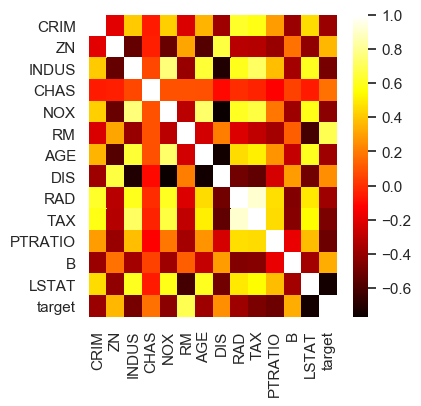

In [10]:
plt.figure(figsize= (4,4), dpi=100)
sns.heatmap(boston_data.corr(),cmap='hot')

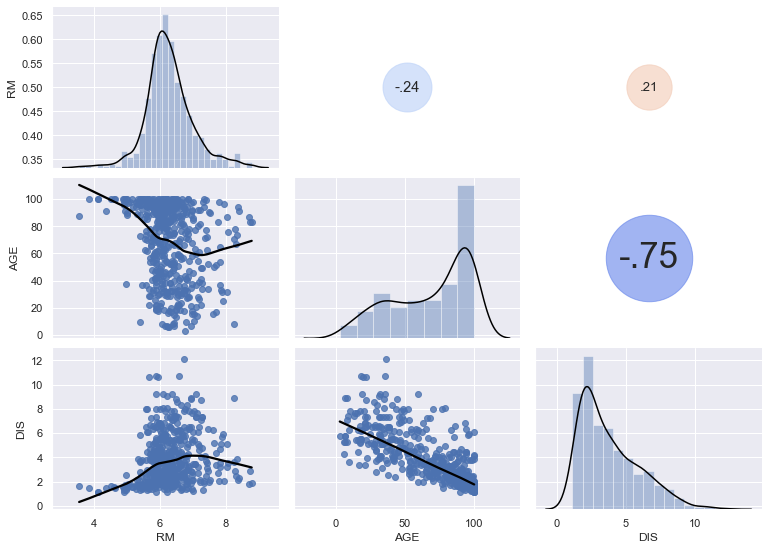

In [11]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

g = sns.PairGrid(boston_data.iloc[:,5:8], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

In [12]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
x='INDUS'
y='TAX'
boston_df = boston_data[[x,y]]
boston_df

,INDUS,TAX
0,2.31,296.0
1,7.07,242.0
2,7.07,242.0
3,2.18,222.0
4,2.18,222.0
...,...,...
501,11.93,273.0
502,11.93,273.0
503,11.93,273.0
504,11.93,273.0


In [14]:
boston_df.corr()

,INDUS,TAX
INDUS,1.00000,0.72076
TAX,0.72076,1.00000


Text(0, 0.5, 'TAX')

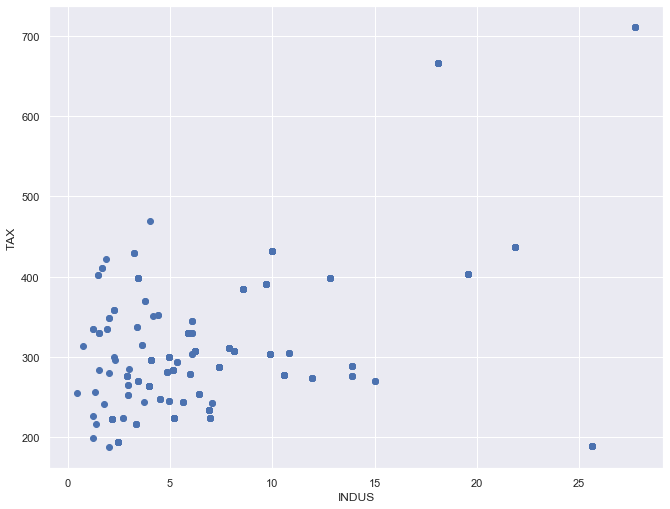

In [15]:
#Multivariate outlier analysis
fig, ax = plt.subplots(figsize=(11,8.5))
ax.scatter(boston_df[x], boston_df[y])
ax.set_xlabel(x)
ax.set_ylabel(y)

Text(0.5, 1.0, 'PCA Graph')

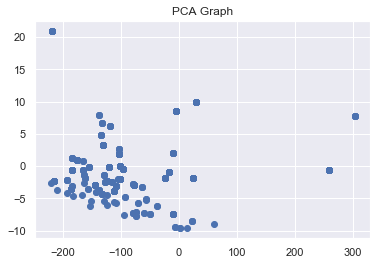

In [16]:
pca = PCA(n_components=boston_df.shape[1], svd_solver= 'full')
df = pd.DataFrame(pca.fit_transform(boston_df),index=boston_df.index,columns=boston_df.columns) #[i.lower()+'_pca' for i in boston_df.columns]
plt.scatter(x=df[x],y=df[y])
plt.title('PCA Graph')

In [17]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return np.array(md)

def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

# Check that matrix is positive definite
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [18]:
cov_matrix = np.cov(df.values,rowvar=False)
inv_cov = np.linalg.inv(cov_matrix)
mean = df.values.mean(axis=0)

# Check matrices are positive definite:https://en.wikipedia.org/wiki/Definiteness_of_a_matrix 
assert is_pos_def(cov_matrix) and is_pos_def(inv_cov)
# Check matrices are invereses
np.matmul(cov_matrix,inv_cov).astype(np.float16)

array([[ 1., -0.],
       [ 0.,  1.]], dtype=float16)

Threshold: 2


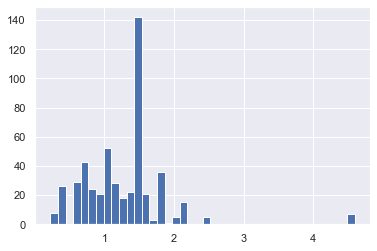

In [19]:
md = MahalanobisDist(inv_cov, mean, df.values, verbose=False)
threshold = 2#MD_threshold(md, extreme = False)
print("Threshold: "+ str(threshold))
plt.hist(list(md),bins=40)
plt.show()

Text(0.5, 0, 'Mahalanobis dist')

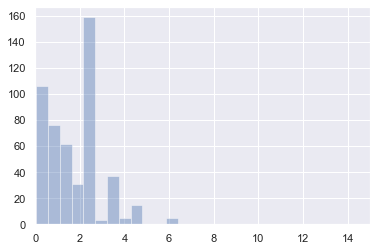

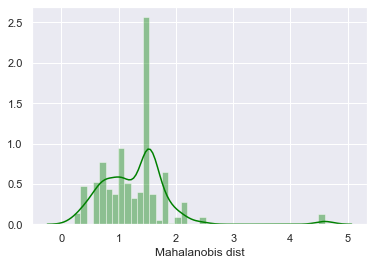

In [20]:
plt.figure()
sns.distplot(np.square(md), bins = 40, kde= False)
plt.xlim([0.0,15])

plt.figure()
sns.distplot(md,
             bins = 40, 
             kde= True, 
            color = 'green')
# plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [21]:
# classify what data is an outlier  
# boston_df['anomaly'] = df['anomaly'] = md>threshold
# boston_df[boston_df.anomaly]
len(boston_df[md>threshold])

30

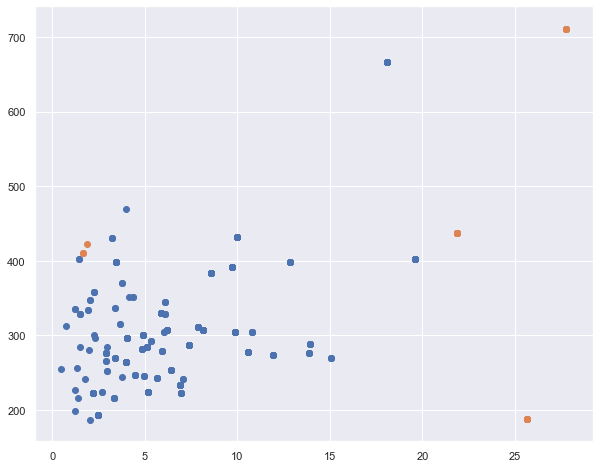

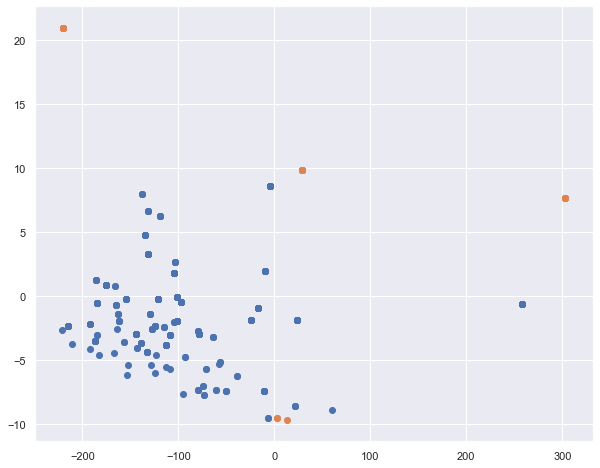

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(boston_df[x][md<=threshold], boston_df[y][md<=threshold])
plt.scatter(boston_df[x][md>threshold], boston_df[y][md>threshold])
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(df[x][md<=threshold], df[y][md<=threshold])
plt.scatter(df[x][md>threshold], df[y][md>threshold])
# plt.plot([threshold]*len(df[x]_pca),df.indus_pca,colour)